In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import os
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Asymptote and Depth Analysis

### Load Dataframes

In [4]:
rootdir = '/Users/harshilavlani/MCM Project'
csvpaths = []
for f0 in os.scandir(rootdir):
    if f0.is_dir() and f0.name != "__pycache__":
        csvpath = f"{rootdir}/{f0.name}/finaldf.csv"
        csvpaths.append(csvpath)

In [5]:
oslodf = pd.read_csv(csvpaths[0])
perthdf = pd.read_csv(csvpaths[1])
nairobidf = pd.read_csv(csvpaths[2])
lagosdf = pd.read_csv(csvpaths[3])

In [6]:
if {'Unnamed: 0'}.issubset(oslodf.columns):
    oslodf = oslodf.drop(columns=['Unnamed: 0'])
if {'Unnamed: 0'}.issubset(perthdf.columns):
    perthdf = perthdf.drop(columns=['Unnamed: 0'])
if {'Unnamed: 0'}.issubset(nairobidf.columns):
    nairobidf = nairobidf.drop(columns=['Unnamed: 0'])
if {'Unnamed: 0'}.issubset(lagosdf.columns):
    lagosdf = lagosdf.drop(columns=['Unnamed: 0'])

### Filter Asymptotes

In [7]:
oslodf = oslodf[oslodf.Depth != 1000]
oslodf = oslodf[oslodf.Asymptotes < 1800]
oslodf = oslodf[oslodf.Asymptotes > 1000]

perthdf = perthdf[perthdf.Depth != 1000]
perthdf = perthdf[perthdf.Asymptotes < 1800]
perthdf = perthdf[perthdf.Asymptotes > 1000]

nairobidf = nairobidf[nairobidf.Depth != 1000]
nairobidf = nairobidf[nairobidf.Asymptotes < 1800]
nairobidf = nairobidf[nairobidf.Asymptotes > 1000]

lagosdf = lagosdf[lagosdf.Depth != 1000]
lagosdf = lagosdf[lagosdf.Asymptotes < 1800]
lagosdf = lagosdf[lagosdf.Asymptotes > 1000]


### Split Dataframes

In [8]:
oslodf_mcm_0_1 = oslodf.loc[(perthdf['Pair'] == '0_1') & (oslodf['Type'] == 'MCM')]
oslodf_mcm_4_6 = oslodf.loc[(oslodf['Pair'] == '4_6') & (oslodf['Type'] == 'MCM')]
oslodf_mcm_0_6 = oslodf.loc[(oslodf['Pair'] == '0_6') & (oslodf['Type'] == 'MCM')]

oslodf_del_0_1 = oslodf.loc[(oslodf['Pair'] == '0_1') & (oslodf['Type'] == 'Del')]
oslodf_del_4_6 = oslodf.loc[(oslodf['Pair'] == '4_6') & (oslodf['Type'] == 'Del')]
oslodf_del_0_6 = oslodf.loc[(oslodf['Pair'] == '0_6') & (oslodf['Type'] == 'Del')]

nairobidf_mcm_0_1 = nairobidf.loc[(nairobidf['Pair'] == '0_1') & (nairobidf['Type'] == 'MCM')]
nairobidf_mcm_4_6 = nairobidf.loc[(nairobidf['Pair'] == '4_6') & (nairobidf['Type'] == 'MCM')]
nairobidf_mcm_0_6 = nairobidf.loc[(nairobidf['Pair'] == '0_6') & (nairobidf['Type'] == 'MCM')]

nairobidf_del_0_1 = nairobidf.loc[(nairobidf['Pair'] == '0_1') & (nairobidf['Type'] == 'Del')]
nairobidf_del_4_6 = nairobidf.loc[(nairobidf['Pair'] == '4_6') & (nairobidf['Type'] == 'Del')]
nairobidf_del_0_6 = nairobidf.loc[(nairobidf['Pair'] == '0_6') & (nairobidf['Type'] == 'Del')]

lagosdf_mcm_0_1 = lagosdf.loc[(lagosdf['Pair'] == '0_1') & (lagosdf['Type'] == 'MCM')]
lagosdf_mcm_4_6 = lagosdf.loc[(lagosdf['Pair'] == '4_6') & (lagosdf['Type'] == 'MCM')]
lagosdf_mcm_0_6 = lagosdf.loc[(lagosdf['Pair'] == '0_6') & (lagosdf['Type'] == 'MCM')]

lagosdf_del_0_1 = lagosdf.loc[(lagosdf['Pair'] == '0_1') & (lagosdf['Type'] == 'Del')]
lagosdf_del_4_6 = lagosdf.loc[(lagosdf['Pair'] == '4_6') & (lagosdf['Type'] == 'Del')]
lagosdf_del_0_6 = lagosdf.loc[(lagosdf['Pair'] == '0_6') & (lagosdf['Type'] == 'Del')]

perthdf_mcm_0_1 = perthdf.loc[(perthdf['Pair'] == '0_1') & (perthdf['Type'] == 'MCM')]
perthdf_mcm_4_6 = perthdf.loc[(perthdf['Pair'] == '4_6') & (perthdf['Type'] == 'MCM')]
perthdf_mcm_0_6 = perthdf.loc[(perthdf['Pair'] == '0_6') & (perthdf['Type'] == 'MCM')]

perthdf_del_0_1 = perthdf.loc[(perthdf['Pair'] == '0_1') & (perthdf['Type'] == 'Del')]
perthdf_del_4_6 = perthdf.loc[(perthdf['Pair'] == '4_6') & (perthdf['Type'] == 'Del')]
perthdf_del_0_6 = perthdf.loc[(perthdf['Pair'] == '0_6') & (perthdf['Type'] == 'Del')]

In [33]:
len(perthdf_del_0_6)

5

### Reassign and Combine DataFrames

In [7]:
oslodf = pd.concat([oslodf_del_0_1, oslodf_del_0_6, oslodf_del_4_6, oslodf_mcm_0_1, oslodf_mcm_0_6, oslodf_mcm_4_6])
nairobidf = pd.concat([nairobidf_del_0_1, nairobidf_del_0_6, nairobidf_del_4_6, nairobidf_mcm_0_1, nairobidf_mcm_0_6, nairobidf_mcm_4_6])
lagosdf = pd.concat([lagosdf_del_0_1, lagosdf_del_0_6, lagosdf_del_4_6, lagosdf_mcm_0_1, lagosdf_mcm_0_6, lagosdf_mcm_4_6])
perthdf = pd.concat([perthdf_del_0_1, perthdf_del_0_6, perthdf_del_4_6, perthdf_mcm_0_1, perthdf_mcm_0_6, perthdf_mcm_4_6])

In [8]:
totaldf = pd.concat([oslodf, perthdf,lagosdf, nairobidf], axis=0)

In [9]:
totaldf.replace({'Type': {'Del': 'Control'}}, inplace=True)

### Graph

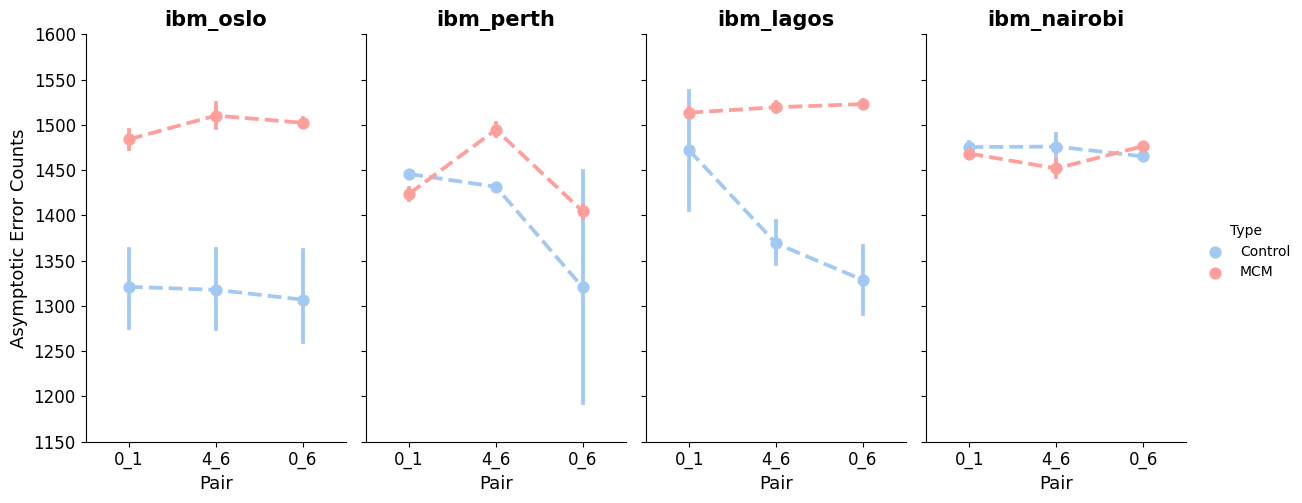

In [10]:
from matplotlib import pyplot
x = sns.catplot(data=totaldf, x="Pair", y="Asymptotes", col="QC", hue='Type', kind="point", height=5, aspect=.6, linestyles=['--', '--'], palette={"Control": '#a1c9f4', "MCM": '#ff9f9b'}, errorbar=('ci', 68), order=['0_1', '4_6', '0_6'])
x.set_ylabels("Asymptotic Error Counts", size=13)
x.set_xlabels("Pair", size=13)

for ax in x.axes.flat:
    w = ax.get_yticklabels()
    break 

x.set_yticklabels(w, size=12)
for ax in x.axes.flat:
    w = ax.get_xticklabels()
    ax.set_xticklabels(w, size=12)

x.set_titles(col_template='{col_name}',weight='bold', size=15)
x

### Mean Analysis

#### Oslo

In [11]:
oslo_mcm_0_1_asymptote = st.t.interval(confidence=0.8, df=len(oslodf_mcm_0_1.Asymptotes)-1, loc=np.mean(oslodf_mcm_0_1.Asymptotes), scale=st.sem(oslodf_mcm_0_1.Asymptotes))
oslo_mcm_0_1_depth = np.mean(oslodf_mcm_0_1.Depth)

oslo_del_0_1_asymptote = st.t.interval(confidence=0.8, df=len(oslodf_del_0_1.Asymptotes)-1, loc=np.mean(oslodf_del_0_1.Asymptotes), scale=st.sem(oslodf_del_0_1.Asymptotes))
oslo_del_0_1_depth = np.mean(oslodf_del_0_1.Depth)

print(f"MCM Asymptote Mean {oslo_mcm_0_1_asymptote}")
print(f"MCM Depth Mean {oslo_mcm_0_1_depth}")
print(f"Del Asymptote Mean {oslo_del_0_1_asymptote}")
print(f"Del Depth Mean {oslo_del_0_1_depth}")

MCM Asymptote Mean (1476.1524876015599, 1497.5765090184002)
MCM Depth Mean 12.8
Del Asymptote Mean (1264.3597800725397, 1377.89561775937)
Del Depth Mean 160.54545454545453


In [12]:
oslo_mcm_0_6_asymptote = st.t.interval(confidence=0.8, df=len(oslodf_mcm_0_6.Asymptotes)-1, loc=np.mean(oslodf_mcm_0_6.Asymptotes), scale=st.sem(oslodf_mcm_0_6.Asymptotes))
oslo_mcm_0_6_depth = np.mean(oslodf_mcm_0_6.Depth)

oslo_del_0_6_asymptote = st.t.interval(confidence=0.8, df=len(oslodf_del_0_6.Asymptotes)-1, loc=np.mean(oslodf_del_0_6.Asymptotes), scale=st.sem(oslodf_del_0_6.Asymptotes))
oslo_del_0_6_depth = np.mean(oslodf_del_0_6.Depth)

print(f"MCM Asymptote Mean {oslo_mcm_0_6_asymptote}")
print(f"MCM Depth Mean {oslo_mcm_0_6_depth}")
print(f"Del Asymptote Mean {oslo_del_0_6_asymptote}")
print(f"Del Depth Mean {oslo_del_0_6_depth}")

MCM Asymptote Mean (1497.1765375995265, 1511.6070538961658)
MCM Depth Mean 18.95
Del Asymptote Mean (1235.8999117845, 1377.937932539839)
Del Depth Mean 119.71428571428571


In [13]:
oslo_mcm_4_6_asymptote = st.t.interval(confidence=0.8, df=len(oslodf_mcm_4_6.Asymptotes)-1, loc=np.mean(oslodf_mcm_4_6.Asymptotes), scale=st.sem(oslodf_mcm_4_6.Asymptotes))
oslo_mcm_4_6_depth = np.mean(oslodf_mcm_4_6.Depth)

oslo_del_4_6_asymptote = st.t.interval(confidence=0.8, df=len(oslodf_del_4_6.Asymptotes)-1, loc=np.mean(oslodf_del_4_6.Asymptotes), scale=st.sem(oslodf_del_4_6.Asymptotes))
oslo_del_4_6_depth = np.mean(oslodf_del_4_6.Depth)

print(f"MCM Asymptote Mean {oslo_mcm_4_6_asymptote}")
print(f"MCM Depth Mean {oslo_mcm_4_6_depth}")
print(f"Del Asymptote Mean {oslo_del_4_6_asymptote}")
print(f"Del Depth Mean {oslo_del_4_6_depth}")

MCM Asymptote Mean (1490.9667149013605, 1529.5615241967523)
MCM Depth Mean 33.92307692307692
Del Asymptote Mean (1256.8102123165513, 1378.7586143923672)
Del Depth Mean 128.74074074074073


#### Nairobi

In [14]:
nairobi_mcm_0_1_asymptote = st.t.interval(confidence=0.8, df=len(nairobidf_mcm_0_1.Asymptotes)-1, loc=np.mean(nairobidf_mcm_0_1.Asymptotes), scale=st.sem(nairobidf_mcm_0_1.Asymptotes))
nairobi_mcm_0_1_depth = np.mean(nairobidf_mcm_0_1.Depth)

nairobi_del_0_1_asymptote = st.t.interval(confidence=0.8, df=len(nairobidf_del_0_1.Asymptotes)-1, loc=np.mean(nairobidf_del_0_1.Asymptotes), scale=st.sem(nairobidf_del_0_1.Asymptotes))
nairobi_del_0_1_depth = np.mean(nairobidf_del_0_1.Depth)

print(f"MCM Asymptote Mean {nairobi_mcm_0_1_asymptote}")
print(f"MCM Depth Mean {nairobi_mcm_0_1_depth}")
print(f"Del Asymptote Mean {nairobi_del_0_1_asymptote}")
print(f"Del Depth Mean {nairobi_del_0_1_depth}")

MCM Asymptote Mean (1461.7529780520922, 1474.8699471052719)
MCM Depth Mean 5.375
Del Asymptote Mean (1468.031062317453, 1482.966545146199)
Del Depth Mean 5.75


In [15]:
nairobi_mcm_0_6_asymptote = st.t.interval(confidence=0.8, df=len(nairobidf_mcm_0_6.Asymptotes)-1, loc=np.mean(nairobidf_mcm_0_6.Asymptotes), scale=st.sem(nairobidf_mcm_0_6.Asymptotes))
nairobi_mcm_0_6_depth = np.mean(nairobidf_mcm_0_6.Depth)

nairobi_del_0_6_asymptote = st.t.interval(confidence=0.8, df=len(nairobidf_del_0_6.Asymptotes)-1, loc=np.mean(nairobidf_del_0_6.Asymptotes), scale=st.sem(nairobidf_del_0_6.Asymptotes))
nairobi_del_0_6_depth = np.mean(nairobidf_del_0_6.Depth)

print(f"MCM Asymptote Mean {nairobi_mcm_0_6_asymptote}")
print(f"MCM Depth Mean {nairobi_mcm_0_6_depth}")
print(f"Del Asymptote Mean {nairobi_del_0_6_asymptote}")
print(f"Del Depth Mean {nairobi_del_0_6_depth}")

MCM Asymptote Mean (1471.1198238985296, 1481.85386345872)
MCM Depth Mean 5.304347826086956
Del Asymptote Mean (1460.3096255554156, 1470.0798797327907)
Del Depth Mean 7.086956521739131


In [16]:
nairobi_mcm_4_6_asymptote = st.t.interval(confidence=0.8, df=len(nairobidf_mcm_4_6.Asymptotes)-1, loc=np.mean(nairobidf_mcm_4_6.Asymptotes), scale=st.sem(nairobidf_mcm_4_6.Asymptotes))
nairobi_mcm_4_6_depth = np.mean(nairobidf_mcm_4_6.Depth)

nairobi_del_4_6_asymptote = st.t.interval(confidence=0.8, df=len(nairobidf_del_4_6.Asymptotes)-1, loc=np.mean(nairobidf_del_4_6.Asymptotes), scale=st.sem(nairobidf_del_4_6.Asymptotes))
nairobi_del_4_6_depth = np.mean(nairobidf_del_4_6.Depth)

print(f"MCM Asymptote Mean {nairobi_mcm_4_6_asymptote}")
print(f"MCM Depth Mean {nairobi_mcm_4_6_depth}")
print(f"Del Asymptote Mean {nairobi_del_4_6_asymptote}")
print(f"Del Depth Mean {nairobi_del_4_6_depth}")

MCM Asymptote Mean (1437.5498969103662, 1466.128724792474)
MCM Depth Mean 11.444444444444445
Del Asymptote Mean (1432.267826418218, 1519.8141789585422)
Del Depth Mean 5.5


#### Lagos

In [17]:
lagos_mcm_0_1_asymptote = st.t.interval(confidence=0.8, df=len(lagosdf_mcm_0_1.Asymptotes)-1, loc=np.mean(lagosdf_mcm_0_1.Asymptotes), scale=st.sem(lagosdf_mcm_0_1.Asymptotes))
lagos_mcm_0_1_depth = np.mean(lagosdf_mcm_0_1.Depth)

lagos_del_0_1_asymptote = st.t.interval(confidence=0.8, df=len(lagosdf_del_0_1.Asymptotes)-1, loc=np.mean(lagosdf_del_0_1.Asymptotes), scale=st.sem(lagosdf_del_0_1.Asymptotes))
lagos_del_0_1_depth = np.mean(lagosdf_del_0_1.Depth)

print(f"MCM Asymptote Mean {lagos_mcm_0_1_asymptote}")
print(f"MCM Depth Mean {lagos_mcm_0_1_depth}")
print(f"Del Asymptote Mean {lagos_del_0_1_asymptote}")
print(f"Del Depth Mean {lagos_del_0_1_depth}")

MCM Asymptote Mean (1506.9026950483228, 1520.118005174261)
MCM Depth Mean 11.666666666666666
Del Asymptote Mean (1346.8324655228128, 1596.6350303661072)
Del Depth Mean 116.0


In [18]:
lagos_mcm_0_6_asymptote = st.t.interval(confidence=0.8, df=len(lagosdf_mcm_0_6.Asymptotes)-1, loc=np.mean(lagosdf_mcm_0_6.Asymptotes), scale=st.sem(lagosdf_mcm_0_6.Asymptotes))
lagos_mcm_0_6_depth = np.mean(lagosdf_mcm_0_6.Depth)

lagos_del_0_6_asymptote = st.t.interval(confidence=0.8, df=len(lagosdf_del_0_6.Asymptotes)-1, loc=np.mean(lagosdf_del_0_6.Asymptotes), scale=st.sem(lagosdf_del_0_6.Asymptotes))
lagos_del_0_6_depth = np.mean(lagosdf_del_0_6.Depth)

print(f"MCM Asymptote Mean {lagos_mcm_0_6_asymptote}")
print(f"MCM Depth Mean {lagos_mcm_0_6_depth}")
print(f"Del Asymptote Mean {lagos_del_0_6_asymptote}")
print(f"Del Depth Mean {lagos_del_0_6_depth}")

MCM Asymptote Mean (1516.7923491549548, 1529.08342248853)
MCM Depth Mean 10.525
Del Asymptote Mean (1276.1850659814554, 1381.0701523189773)
Del Depth Mean 199.48387096774192


In [19]:
lagos_mcm_4_6_asymptote = st.t.interval(confidence=0.8, df=len(lagosdf_mcm_4_6.Asymptotes)-1, loc=np.mean(lagosdf_mcm_4_6.Asymptotes), scale=st.sem(lagosdf_mcm_4_6.Asymptotes))
lagos_mcm_4_6_depth = np.mean(lagosdf_mcm_4_6.Depth)

lagos_del_4_6_asymptote = st.t.interval(confidence=0.8, df=len(lagosdf_del_4_6.Asymptotes)-1, loc=np.mean(lagosdf_del_4_6.Asymptotes), scale=st.sem(lagosdf_del_4_6.Asymptotes))
lagos_del_4_6_depth = np.mean(lagosdf_del_4_6.Depth)

print(f"MCM Asymptote Mean {lagos_mcm_4_6_asymptote}")
print(f"MCM Depth Mean {lagos_mcm_4_6_depth}")
print(f"Del Asymptote Mean {lagos_del_4_6_asymptote}")
print(f"Del Depth Mean {lagos_del_4_6_depth}")

MCM Asymptote Mean (1512.6401584436476, 1526.3385408460065)
MCM Depth Mean 8.310344827586206
Del Asymptote Mean (1335.4055722590717, 1402.6852562163679)
Del Depth Mean 165.0952380952381


#### Perth

In [20]:
perth_mcm_0_1_asymptote = st.t.interval(confidence=0.8, df=len(perthdf_mcm_0_1.Asymptotes)-1, loc=np.mean(perthdf_mcm_0_1.Asymptotes), scale=st.sem(perthdf_mcm_0_1.Asymptotes))
perth_mcm_0_1_depth = np.mean(perthdf_mcm_0_1.Depth)

perth_del_0_1_asymptote = st.t.interval(confidence=0.8, df=len(perthdf_del_0_1.Asymptotes)-1, loc=np.mean(perthdf_del_0_1.Asymptotes), scale=st.sem(perthdf_del_0_1.Asymptotes))
perth_del_0_1_depth = np.mean(perthdf_del_0_1.Depth)

print(f"MCM Asymptote Mean {perth_mcm_0_1_asymptote}")
print(f"MCM Depth Mean {perth_mcm_0_1_depth}")
print(f"Del Asymptote Mean {perth_del_0_1_asymptote}")
print(f"Del Depth Mean {perth_del_0_1_depth}")

MCM Asymptote Mean (1414.3251088263967, 1433.5626285114079)
MCM Depth Mean 13.333333333333334
Del Asymptote Mean (1442.8167542317917, 1448.578568860468)
Del Depth Mean 26.5


In [21]:
perth_mcm_0_6_asymptote = st.t.interval(confidence=0.8, df=len(perthdf_mcm_0_6.Asymptotes)-1, loc=np.mean(perthdf_mcm_0_6.Asymptotes), scale=st.sem(perthdf_mcm_0_6.Asymptotes))
perth_mcm_0_6_depth = np.mean(perthdf_mcm_0_6.Depth)

perth_del_0_6_asymptote = st.t.interval(confidence=0.8, df=len(perthdf_del_0_6.Asymptotes)-1, loc=np.mean(perthdf_del_0_6.Asymptotes), scale=st.sem(perthdf_del_0_6.Asymptotes))
perth_del_0_6_depth = np.mean(perthdf_del_0_6.Depth)

print(f"MCM Asymptote Mean {perth_mcm_0_6_asymptote}")
print(f"MCM Depth Mean {perth_mcm_0_6_depth}")
print(f"Del Asymptote Mean {perth_del_0_6_asymptote}")
print(f"Del Depth Mean {perth_del_0_6_depth}")

MCM Asymptote Mean (1394.142848197942, 1414.605454092592)
MCM Depth Mean 9.153846153846153
Del Asymptote Mean (926.3436432022061, 1714.5559655319341)
Del Depth Mean 84.0


In [22]:
perth_mcm_4_6_asymptote = st.t.interval(confidence=0.8, df=len(perthdf_mcm_4_6.Asymptotes)-1, loc=np.mean(perthdf_mcm_4_6.Asymptotes), scale=st.sem(perthdf_mcm_4_6.Asymptotes))
perth_mcm_4_6_depth = np.mean(perthdf_mcm_4_6.Depth)

perth_del_4_6_asymptote = st.t.interval(confidence=0.8, df=len(perthdf_del_4_6.Asymptotes)-1, loc=np.mean(perthdf_del_4_6.Asymptotes), scale=st.sem(perthdf_del_4_6.Asymptotes))
perth_del_4_6_depth = np.mean(perthdf_del_4_6.Depth)- 220

print(f"MCM Asymptote Mean {perth_mcm_4_6_asymptote}")
print(f"MCM Depth Mean {perth_mcm_4_6_depth}")
print(f"Del Asymptote Mean {perth_del_4_6_asymptote}")
print(f"Del Depth Mean {perth_del_4_6_depth}")

MCM Asymptote Mean (1485.031208695315, 1504.1588804354374)
MCM Depth Mean 21.384615384615383
Del Asymptote Mean (nan, nan)
Del Depth Mean 56.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Create Depths DataFrame

In [23]:
oslodepths = [['MCM', '0_1', oslo_mcm_0_1_depth], ['MCM', '4_6', oslo_mcm_4_6_depth], ['MCM', '0_6', oslo_mcm_0_6_depth], ['Del', '0_1', oslo_del_0_6_depth], ['Del', '4_6', oslo_del_4_6_depth], ['Del', '0_6', oslo_del_0_1_depth]]
oslodepthsdf = pd.DataFrame(oslodepths, columns=['Type', 'Pair', 'Depth'])

nairobidepths = [['MCM', '0_1', nairobi_mcm_0_1_depth], ['MCM', '4_6', nairobi_mcm_4_6_depth], ['MCM', '0_6', nairobi_mcm_0_6_depth], ['Del', '0_1', nairobi_del_0_1_depth], ['Del', '4_6', nairobi_del_4_6_depth], ['Del', '0_6', nairobi_del_0_6_depth]]
nairobidepthsdf = pd.DataFrame(nairobidepths, columns=['Type', 'Pair', 'Depth'])

lagosdepths = [['MCM', '0_1', lagos_mcm_0_1_depth], ['MCM', '4_6', lagos_mcm_4_6_depth], ['MCM', '0_6', lagos_mcm_0_6_depth], ['Del', '0_1', lagos_del_0_1_depth], ['Del', '4_6', lagos_del_4_6_depth], ['Del', '0_6', lagos_del_0_6_depth]]
lagosdepthsdf = pd.DataFrame(lagosdepths, columns=['Type', 'Pair', 'Depth'])

perthdepths = [['MCM', '0_1', perth_mcm_0_1_depth], ['MCM', '4_6', perth_mcm_4_6_depth], ['MCM', '0_6', perth_mcm_0_6_depth], ['Del', '0_1', perth_del_0_1_depth], ['Del', '4_6', perth_del_4_6_depth], ['Del', '0_6', perth_del_0_6_depth]]
perthdepthsdf = pd.DataFrame(perthdepths, columns=['Type', 'Pair', 'Depth'])

oslodepthsdf['QC'] = np.repeat('ibm_oslo', len(oslodepthsdf.Type))
nairobidepthsdf['QC'] = np.repeat('ibm_nairobi', len(nairobidepthsdf.Type))
lagosdepthsdf['QC'] = np.repeat('ibm_lagos', len(lagosdepthsdf.Type))
perthdepthsdf['QC'] = np.repeat('ibm_perth', len(perthdepthsdf.Type))

totaldepthsdf = pd.concat([oslodepthsdf, perthdepthsdf, lagosdepthsdf, nairobidepthsdf], axis=0)
totaldepthsdf.replace({'Type': {'Del': 'Control'}}, inplace=True)

## Graph 

[Text(0, 0.0, '0'), Text(0, 25.0, '25'), Text(0, 50.0, '50'), Text(0, 75.0, '75'), Text(0, 100.0, '100'), Text(0, 125.0, '125'), Text(0, 150.0, '150'), Text(0, 175.0, '175'), Text(0, 200.0, '200'), Text(0, 225.0, '225')]


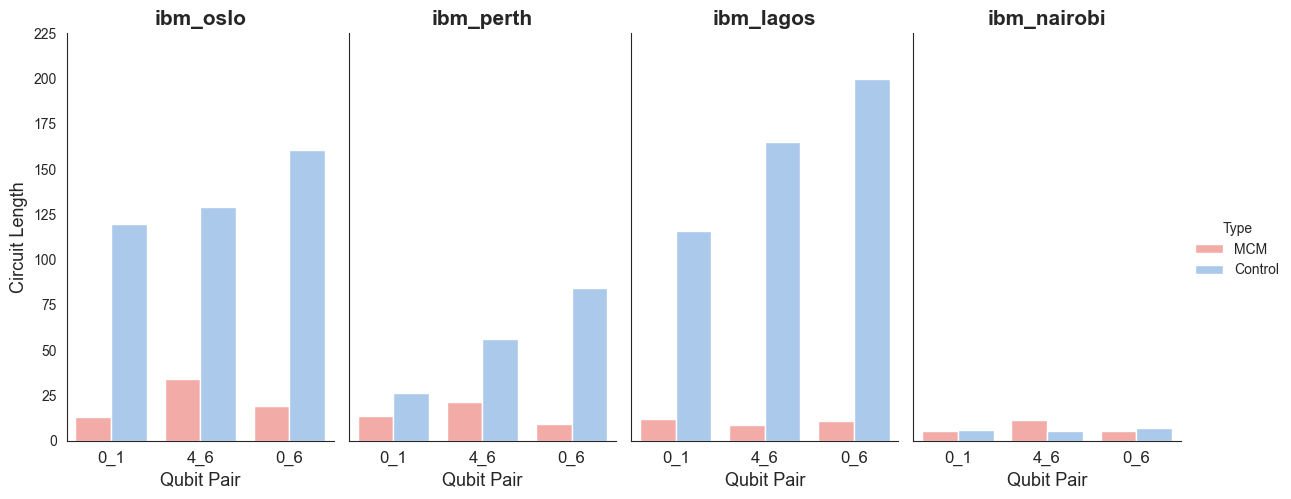

In [24]:
sns.set_style("white")
y = sns.catplot(data=totaldepthsdf, x="Pair", y="Depth", col="QC", hue='Type', kind="bar",
                height=5, aspect=.6,  palette={"Control": '#a1c9f4', "MCM": '#ff9f9b'}, errorbar=('ci', 68))
y.set_ylabels("Circuit Length", size=13)
y.set_xlabels("Qubit Pair", size=13)
y.set_titles(col_template='{col_name}', weight='bold', size=15)

for ax in y.axes.flat:
    w = ax.get_yticklabels()
    print(w)
    break  # get x labels
y.set_yticklabels(w)
for ax in y.axes.flat:
    w = ax.get_xticklabels()
    ax.set_xticklabels(w, size=12)


## T-test Analysis

#### Oslo

In [25]:
print(st.ttest_ind(oslodf_mcm_0_1.Asymptotes, oslodf_del_0_1.Asymptotes).pvalue)
print(st.ttest_ind(oslodf_mcm_0_1.Depth, oslodf_del_0_1.Depth).pvalue)

0.08188758296859927
0.00039031671292917846


In [26]:
print(st.ttest_ind(oslodf_mcm_4_6.Asymptotes, oslodf_del_4_6.Asymptotes).pvalue)
print(st.ttest_ind(oslodf_mcm_4_6.Depth, oslodf_del_4_6.Depth).pvalue)

0.007369740908477242
7.247248409988241e-06


In [27]:
print(st.ttest_ind(oslodf_mcm_0_6.Asymptotes, oslodf_del_0_6.Asymptotes).pvalue)
print(st.ttest_ind(oslodf_mcm_0_6.Depth, oslodf_del_0_6.Depth).pvalue)

0.0009456889395032822
5.414653934267665e-13


#### Perth

In [28]:
print(st.ttest_ind(perthdf_mcm_0_1.Asymptotes, perthdf_del_0_1.Asymptotes).pvalue)
print(st.ttest_ind(perthdf_mcm_0_1.Depth, perthdf_del_0_1.Depth).pvalue)

0.3394993096407176
0.19952619298591012


In [29]:
print(st.ttest_ind(perthdf_mcm_4_6.Asymptotes, perthdf_del_4_6.Asymptotes).pvalue)
print(st.ttest_ind(perthdf_mcm_4_6.Depth, perthdf_del_4_6.Depth).pvalue)

nan
nan


/var/folders/85/nzm_vj2j78921yj8smfjsrx00000gn/T/ipykernel_23966/4000444341.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(st.ttest_ind(perthdf_mcm_4_6.Asymptotes, perthdf_del_4_6.Asymptotes).pvalue)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/85/nzm_vj2j78921yj8smfjsrx00000gn/T/ipykernel_23966/4000444341.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when 

In [30]:
print(st.ttest_ind(perthdf_mcm_0_6.Asymptotes, perthdf_del_0_6.Asymptotes).pvalue)
print(st.ttest_ind(perthdf_mcm_0_6.Depth, perthdf_del_0_6.Depth).pvalue)

0.07288063580090645
0.0019882735367674465


#### Lagos

In [31]:
print(st.ttest_ind(lagosdf_mcm_0_1.Asymptotes, lagosdf_del_0_1.Asymptotes).pvalue)
print(st.ttest_ind(lagosdf_mcm_0_1.Depth, lagosdf_del_0_1.Depth).pvalue)

0.1861140302954294
7.508553151222427e-26


In [32]:
print(st.ttest_ind(lagosdf_mcm_4_6.Asymptotes, lagosdf_del_4_6.Asymptotes).pvalue)
print(st.ttest_ind(lagosdf_mcm_4_6.Depth, lagosdf_del_4_6.Depth).pvalue)

0.00018358229892663302
3.6016764577256925e-28


In [33]:
print(st.ttest_ind(lagosdf_mcm_0_6.Asymptotes, lagosdf_del_0_6.Asymptotes).pvalue)
print(st.ttest_ind(lagosdf_mcm_0_6.Depth, lagosdf_del_0_6.Depth).pvalue)

6.934597091854074e-07
1.838253262323363e-26


#### Nairobi

In [34]:
print(st.ttest_ind(nairobidf_mcm_0_1.Asymptotes, nairobidf_del_0_1.Asymptotes).pvalue)
print(st.ttest_ind(nairobidf_mcm_0_1.Depth, nairobidf_del_0_1.Depth).pvalue)

0.3423355291559085
0.7043337074557022


In [35]:
print(st.ttest_ind(nairobidf_mcm_0_6.Asymptotes, nairobidf_del_0_6.Asymptotes).pvalue)
print(st.ttest_ind(nairobidf_mcm_0_6.Depth, nairobidf_del_0_6.Depth).pvalue)

0.04576733265510467
0.2052701582929571


In [36]:
print(st.ttest_ind(nairobidf_mcm_4_6.Asymptotes, nairobidf_del_4_6.Asymptotes).pvalue)
print(st.ttest_ind(nairobidf_mcm_4_6.Depth, nairobidf_del_4_6.Depth).pvalue)

0.3244443169677548
0.2439082665106353


# Average Error Counts Analysis

## Load DataFrames

In [37]:
errorcountsdict = {}
for f0 in os.scandir(rootdir):
    if f0.is_dir():
        errorcountsholder = []
        for f1 in os.scandir(f0):
            if f1.is_dir():
                errorcountspath = f"{rootdir}/{f0.name}/{f1.name}/errorcounts {f1.name}.csv"
                errorcountsholder.append(errorcountspath)
        errorcountsdict[f0.name] = errorcountsholder

## Oslo

In [38]:
osloerrordf_mcm_0_1 = pd.DataFrame()
osloerrordf_mcm_0_6 = pd.DataFrame()
osloerrordf_mcm_4_6 = pd.DataFrame()
osloerrordf_del_0_1 = pd.DataFrame()
osloerrordf_del_0_6 = pd.DataFrame()
osloerrordf_del_4_6 = pd.DataFrame()

In [39]:
for i in errorcountsdict['ibm_oslo']:
    osloerrordf = pd.read_csv(i).T
    try:
        osloerrordf.drop(['Unnamed: 0'], axis=0, inplace=True)
    except: 
        pass
    osloerrordf_mcm_0_1 = osloerrordf_mcm_0_1.append(osloerrordf.T.iloc[0, np.linspace(2, 46, 45)].copy(deep=True))
    osloerrordf_del_0_1 = osloerrordf_del_0_1.append(osloerrordf.T.iloc[1, np.linspace(2, 46, 45)].copy(deep=True))
    osloerrordf_mcm_4_6 = osloerrordf_mcm_4_6.append(osloerrordf.T.iloc[2, np.linspace(2, 46, 45)].copy(deep=True))
    osloerrordf_del_4_6 = osloerrordf_del_4_6.append(osloerrordf.T.iloc[3, np.linspace(2, 46, 45)].copy(deep=True))
    osloerrordf_mcm_0_6 = osloerrordf_mcm_0_6.append(osloerrordf.T.iloc[4, np.linspace(2, 46, 45)].copy(deep=True))
    osloerrordf_del_0_6 = osloerrordf_del_0_6.append(osloerrordf.T.iloc[5, np.linspace(2, 46, 45)].copy(deep=True))

In [40]:
osloerrordf_mcm_0_1 = osloerrordf_mcm_0_1.T.drop_duplicates()
osloerrordf_mcm_0_6 = osloerrordf_mcm_0_6.T.drop_duplicates()
osloerrordf_mcm_4_6 = osloerrordf_mcm_4_6.T.drop_duplicates()
osloerrordf_del_0_1 = osloerrordf_del_0_1.T.drop_duplicates()
osloerrordf_del_0_6 = osloerrordf_del_0_6.T.drop_duplicates()
osloerrordf_del_4_6 = osloerrordf_del_4_6.T.drop_duplicates()


## Perth

In [41]:
pertherrordf_mcm_0_1 = pd.DataFrame()
pertherrordf_mcm_0_6 = pd.DataFrame()
pertherrordf_mcm_4_6 = pd.DataFrame()
pertherrordf_del_0_1 = pd.DataFrame()
pertherrordf_del_0_6 = pd.DataFrame()
pertherrordf_del_4_6 = pd.DataFrame()

In [42]:
for i in errorcountsdict['ibm_perth']:
    pertherrordf = pd.read_csv(i).T
    try:
        pertherrordf.drop(['Unnamed: 0'], axis=0, inplace=True)
    except: 
        pass
    pertherrordf_mcm_0_1 = pertherrordf_mcm_0_1.append(pertherrordf.T.iloc[0, np.linspace(2, 46, 45)].copy(deep=True))
    pertherrordf_del_0_1 = pertherrordf_del_0_1.append(pertherrordf.T.iloc[1, np.linspace(2, 46, 45)].copy(deep=True))
    pertherrordf_mcm_4_6 = pertherrordf_mcm_4_6.append(pertherrordf.T.iloc[2, np.linspace(2, 46, 45)].copy(deep=True))
    pertherrordf_del_4_6 = pertherrordf_del_4_6.append(pertherrordf.T.iloc[3, np.linspace(2, 46, 45)].copy(deep=True))
    pertherrordf_mcm_0_6 = pertherrordf_mcm_0_6.append(pertherrordf.T.iloc[4, np.linspace(2, 46, 45)].copy(deep=True))
    pertherrordf_del_0_6 = pertherrordf_del_0_6.append(pertherrordf.T.iloc[5, np.linspace(2, 46, 45)].copy(deep=True))

In [43]:
pertherrordf_mcm_0_1 = pertherrordf_mcm_0_1.T.drop_duplicates()
pertherrordf_mcm_0_6 = pertherrordf_mcm_0_6.T.drop_duplicates()
pertherrordf_mcm_4_6 = pertherrordf_mcm_4_6.T.drop_duplicates()
pertherrordf_del_0_1 = pertherrordf_del_0_1.T.drop_duplicates()
pertherrordf_del_0_6 = pertherrordf_del_0_6.T.drop_duplicates()
pertherrordf_del_4_6 = pertherrordf_del_4_6.T.drop_duplicates()

## Nairobi

In [44]:
nairobierrordf_mcm_0_1 = pd.DataFrame()
nairobierrordf_mcm_0_6 = pd.DataFrame()
nairobierrordf_mcm_4_6 = pd.DataFrame()
nairobierrordf_del_0_1 = pd.DataFrame()
nairobierrordf_del_0_6 = pd.DataFrame()
nairobierrordf_del_4_6 = pd.DataFrame()

In [45]:
for i in errorcountsdict['ibm_nairobi']:
    nairobierrordf = pd.read_csv(i).T
    try:
        nairobierrordf.drop(['Unnamed: 0'], axis=0, inplace=True)
    except: 
        pass
    nairobierrordf_mcm_0_1 = nairobierrordf_mcm_0_1.append(nairobierrordf.T.iloc[0, np.linspace(2, 46, 45)].copy(deep=True))
    nairobierrordf_del_0_1 = nairobierrordf_del_0_1.append(nairobierrordf.T.iloc[1, np.linspace(2, 46, 45)].copy(deep=True))
    nairobierrordf_mcm_4_6 = nairobierrordf_mcm_4_6.append(nairobierrordf.T.iloc[2, np.linspace(2, 46, 45)].copy(deep=True))
    nairobierrordf_del_4_6 = nairobierrordf_del_4_6.append(nairobierrordf.T.iloc[3, np.linspace(2, 46, 45)].copy(deep=True))
    nairobierrordf_mcm_0_6 = nairobierrordf_mcm_0_6.append(nairobierrordf.T.iloc[4, np.linspace(2, 46, 45)].copy(deep=True))
    nairobierrordf_del_0_6 = nairobierrordf_del_0_6.append(nairobierrordf.T.iloc[5, np.linspace(2, 46, 45)].copy(deep=True))

In [46]:
nairobierrordf_mcm_0_1 = nairobierrordf_mcm_0_1.T.drop_duplicates()
nairobierrordf_mcm_0_6 = nairobierrordf_mcm_0_6.T.drop_duplicates()
nairobierrordf_mcm_4_6 = nairobierrordf_mcm_4_6.T.drop_duplicates()
nairobierrordf_del_0_1 = nairobierrordf_del_0_1.T.drop_duplicates()
nairobierrordf_del_0_6 = nairobierrordf_del_0_6.T.drop_duplicates()
nairobierrordf_del_4_6 = nairobierrordf_del_4_6.T.drop_duplicates()

## Lagos

In [47]:
lagoserrordf_mcm_0_1 = pd.DataFrame()
lagoserrordf_mcm_0_6 = pd.DataFrame()
lagoserrordf_mcm_4_6 = pd.DataFrame()
lagoserrordf_del_0_1 = pd.DataFrame()
lagoserrordf_del_0_6 = pd.DataFrame()
lagoserrordf_del_4_6 = pd.DataFrame()

In [48]:
for i in errorcountsdict['ibm_lagos']:
    try:
        lagoserrordf = pd.read_csv(i).T
    except: 
        pass
    try:
        lagoserrordf.drop(['Unnamed: 0'], axis=0, inplace=True)
    except: 
        pass
    lagoserrordf_mcm_0_1 = lagoserrordf_mcm_0_1.append(lagoserrordf.T.iloc[0, np.linspace(2, 46, 45)].copy(deep=True))
    lagoserrordf_del_0_1 = lagoserrordf_del_0_1.append(lagoserrordf.T.iloc[1, np.linspace(2, 46, 45)].copy(deep=True))
    lagoserrordf_mcm_4_6 = lagoserrordf_mcm_4_6.append(lagoserrordf.T.iloc[2, np.linspace(2, 46, 45)].copy(deep=True))
    lagoserrordf_del_4_6 = lagoserrordf_del_4_6.append(lagoserrordf.T.iloc[3, np.linspace(2, 46, 45)].copy(deep=True))
    lagoserrordf_mcm_0_6 = lagoserrordf_mcm_0_6.append(lagoserrordf.T.iloc[4, np.linspace(2, 46, 45)].copy(deep=True))
    lagoserrordf_del_0_6 = lagoserrordf_del_0_6.append(lagoserrordf.T.iloc[5, np.linspace(2, 46, 45)].copy(deep=True))

In [49]:
lagoserrordf_mcm_0_1 = lagoserrordf_mcm_0_1.T.drop_duplicates()
lagoserrordf_mcm_0_6 = lagoserrordf_mcm_0_6.T.drop_duplicates()
lagoserrordf_mcm_4_6 = lagoserrordf_mcm_4_6.T.drop_duplicates()
lagoserrordf_del_0_1 = lagoserrordf_del_0_1.T.drop_duplicates()
lagoserrordf_del_0_6 = lagoserrordf_del_0_6.T.drop_duplicates()
lagoserrordf_del_4_6 = lagoserrordf_del_4_6.T.drop_duplicates()

In [50]:
x = np.linspace(1, 45, 45)

## Graphing

#### Lagos

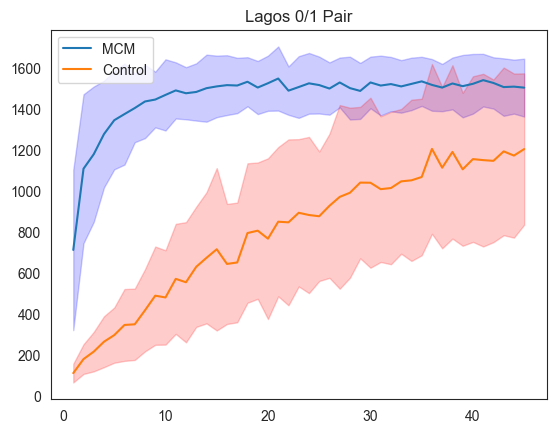

In [51]:
mean = lagoserrordf_mcm_0_1.T.describe().loc['mean']
std = lagoserrordf_mcm_0_1.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = lagoserrordf_del_0_1.T.describe().loc['mean']
std2 = lagoserrordf_del_0_1.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Lagos 0/1 Pair")
plt.legend()

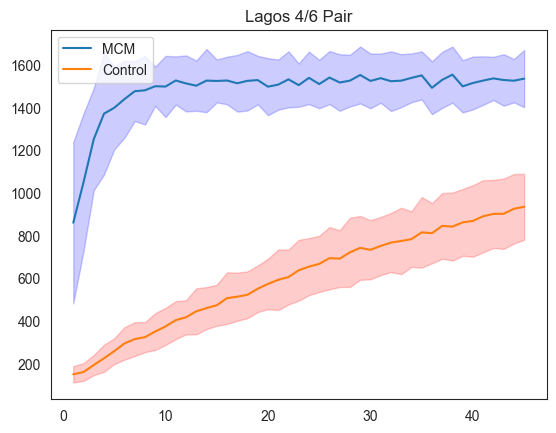

In [52]:
mean = lagoserrordf_mcm_4_6.T.describe().loc['mean']
std = lagoserrordf_mcm_4_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = lagoserrordf_del_4_6.T.describe().loc['mean']
std2 = lagoserrordf_del_4_6.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Lagos 4/6 Pair")
plt.legend()


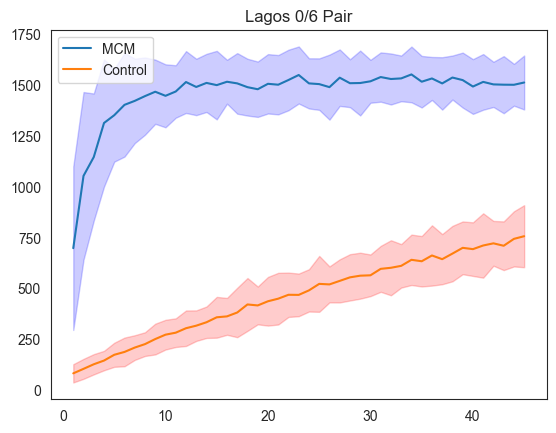

In [53]:
mean = lagoserrordf_mcm_0_6.T.describe().loc['mean']
std = lagoserrordf_mcm_0_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = lagoserrordf_del_0_6.T.describe().loc['mean']
std2 = lagoserrordf_del_0_6.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Lagos 0/6 Pair")
plt.legend()

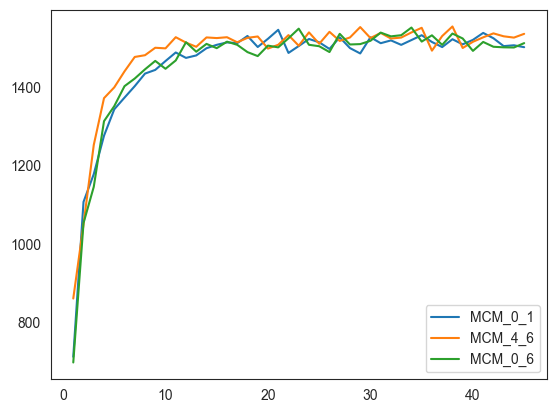

In [54]:
mean = lagoserrordf_mcm_0_1.T.describe().loc['mean']
std = lagoserrordf_mcm_0_1.T.describe().loc['std']
plt.plot(x, mean, label="MCM_0_1")
#plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)

mean = lagoserrordf_mcm_4_6.T.describe().loc['mean']
std = lagoserrordf_mcm_4_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM_4_6")
#plt.fill_between(x, mean - std, mean + std, color='r', alpha=0.2)

mean = lagoserrordf_mcm_0_6.T.describe().loc['mean']
std = lagoserrordf_mcm_0_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM_0_6")
#plt.fill_between(x, mean - std, mean + std, color='g', alpha=0.2)
plt.legend()

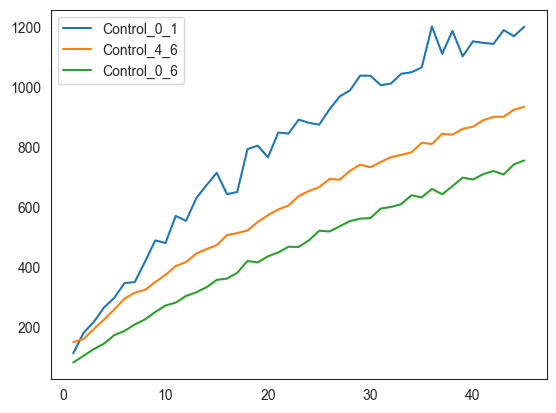

In [55]:
mean = lagoserrordf_del_0_1.T.describe().loc['mean']
std = lagoserrordf_del_0_1.T.describe().loc['std']
plt.plot(x, mean, label="Control_0_1")
#plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)

mean = lagoserrordf_del_4_6.T.describe().loc['mean']
std = lagoserrordf_del_4_6.T.describe().loc['std']
plt.plot(x, mean, label="Control_4_6")
#plt.fill_between(x, mean - std, mean + std, color='r', alpha=0.2)

mean = lagoserrordf_del_0_6.T.describe().loc['mean']
std = lagoserrordf_del_0_6.T.describe().loc['std']
plt.plot(x, mean, label="Control_0_6")
#plt.fill_between(x, mean - std, mean + std, color='g', alpha=0.2)
plt.legend()


#### Oslo

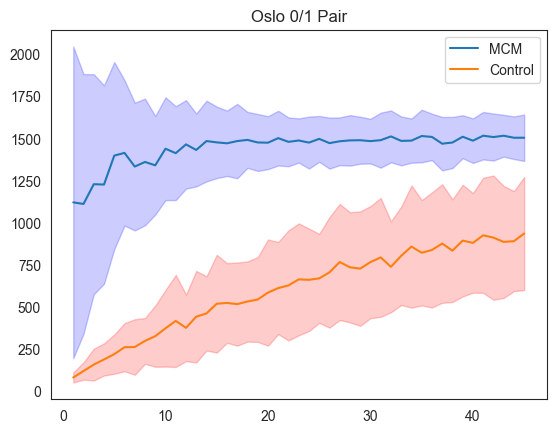

In [56]:
mean = osloerrordf_mcm_0_1.T.describe().loc['mean']
std = osloerrordf_mcm_0_1.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = osloerrordf_del_0_1.T.describe().loc['mean']
std2 = osloerrordf_del_0_1.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Oslo 0/1 Pair")
plt.legend()

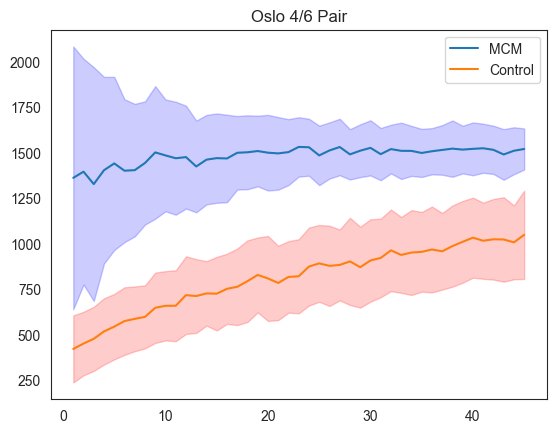

In [57]:
mean = osloerrordf_mcm_4_6.T.describe().loc['mean']
std = osloerrordf_mcm_4_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = osloerrordf_del_4_6.T.describe().loc['mean']
std2 = osloerrordf_del_4_6.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Oslo 4/6 Pair")
plt.legend()

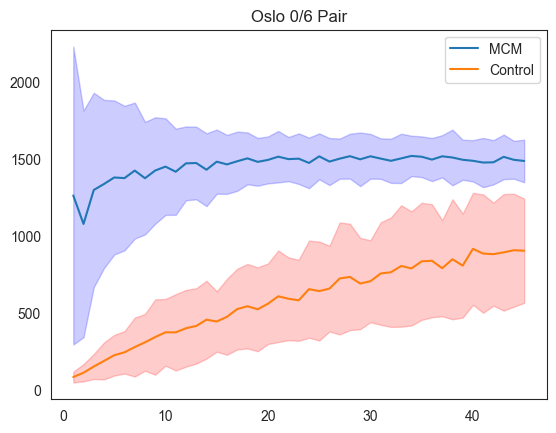

In [58]:
mean = osloerrordf_mcm_0_6.T.describe().loc['mean']
std = osloerrordf_mcm_0_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = osloerrordf_del_0_6.T.describe().loc['mean']
std2 = osloerrordf_del_0_6.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Oslo 0/6 Pair")
plt.legend()

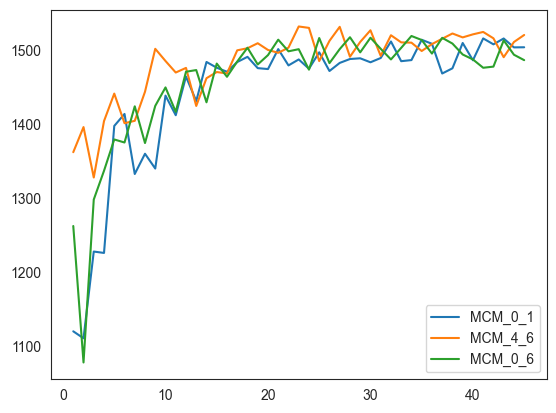

In [59]:
mean = osloerrordf_mcm_0_1.T.describe().loc['mean']
std = osloerrordf_mcm_0_1.T.describe().loc['std']
plt.plot(x, mean, label="MCM_0_1")
# plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)

mean = osloerrordf_mcm_4_6.T.describe().loc['mean']
std = osloerrordf_mcm_4_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM_4_6")
# plt.fill_between(x, mean - std, mean + std, color='r', alpha=0.2)

mean = osloerrordf_mcm_0_6.T.describe().loc['mean']
std = osloerrordf_mcm_0_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM_0_6")
# plt.fill_between(x, mean - std, mean + std, color='g', alpha=0.2)
plt.legend()

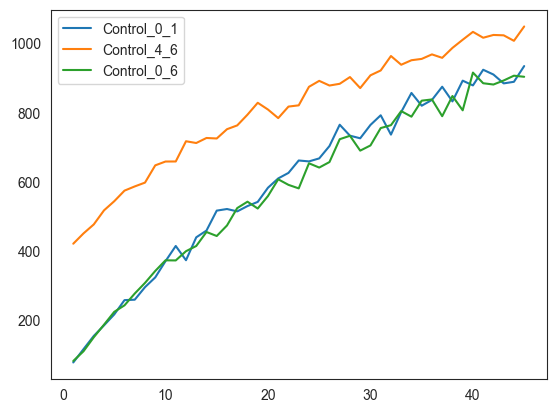

In [60]:
mean = osloerrordf_del_0_1.T.describe().loc['mean']
std = osloerrordf_del_0_1.T.describe().loc['std']
plt.plot(x, mean, label="Control_0_1")
# plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)

mean = osloerrordf_del_4_6.T.describe().loc['mean']
std = osloerrordf_del_4_6.T.describe().loc['std']
plt.plot(x, mean, label="Control_4_6")
# plt.fill_between(x, mean - std, mean + std, color='r', alpha=0.2)

mean = osloerrordf_del_0_6.T.describe().loc['mean']
std = osloerrordf_del_0_6.T.describe().loc['std']
plt.plot(x, mean, label="Control_0_6")
# plt.fill_between(x, mean - std, mean + std, color='g', alpha=0.2)
plt.legend()

#### Nairobi

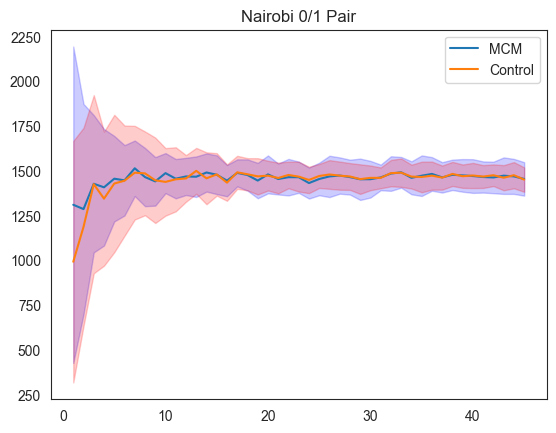

In [61]:
mean = nairobierrordf_mcm_0_1.T.describe().loc['mean']
std = nairobierrordf_mcm_0_1.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = nairobierrordf_del_0_1.T.describe().loc['mean']
std2 = nairobierrordf_del_0_1.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Nairobi 0/1 Pair")
plt.legend()


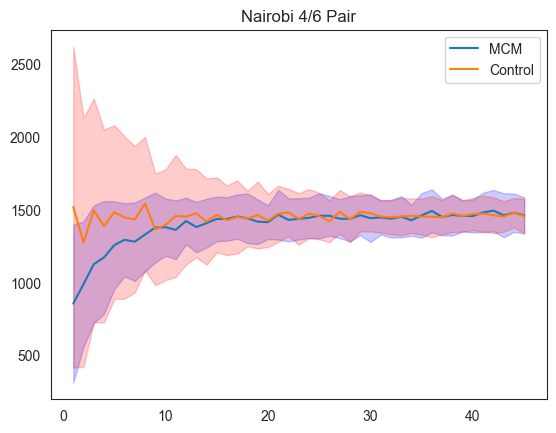

In [62]:
mean = nairobierrordf_mcm_4_6.T.describe().loc['mean']
std = nairobierrordf_mcm_4_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = nairobierrordf_del_4_6.T.describe().loc['mean']
std2 = nairobierrordf_del_4_6.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Nairobi 4/6 Pair")
plt.legend()


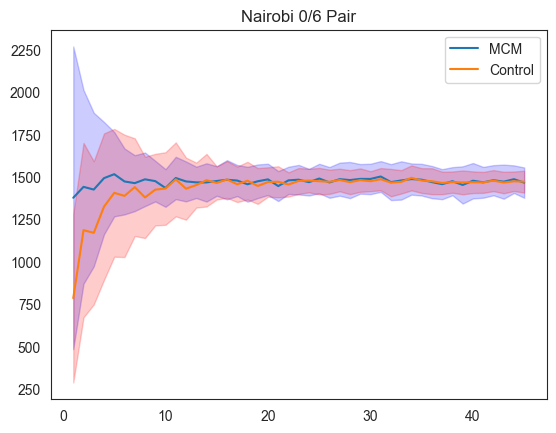

In [63]:
mean = nairobierrordf_mcm_0_6.T.describe().loc['mean']
std = nairobierrordf_mcm_0_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = nairobierrordf_del_0_6.T.describe().loc['mean']
std2 = nairobierrordf_del_0_6.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Nairobi 0/6 Pair")
plt.legend()

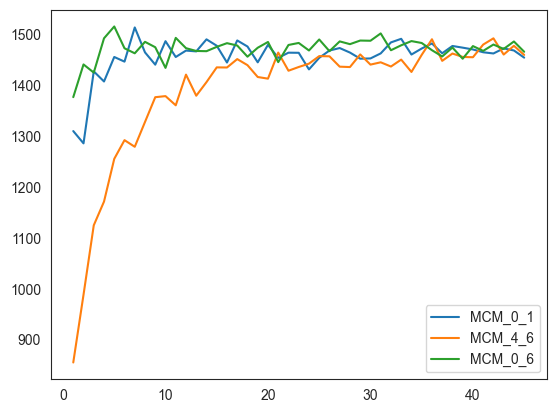

In [64]:
mean = nairobierrordf_mcm_0_1.T.describe().loc['mean']
std = nairobierrordf_mcm_0_1.T.describe().loc['std']
plt.plot(x, mean, label="MCM_0_1")
# plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)

mean = nairobierrordf_mcm_4_6.T.describe().loc['mean']
std = nairobierrordf_mcm_4_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM_4_6")
# plt.fill_between(x, mean - std, mean + std, color='r', alpha=0.2)

mean = nairobierrordf_mcm_0_6.T.describe().loc['mean']
std = nairobierrordf_mcm_0_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM_0_6")
# plt.fill_between(x, mean - std, mean + std, color='g', alpha=0.2)
plt.legend()


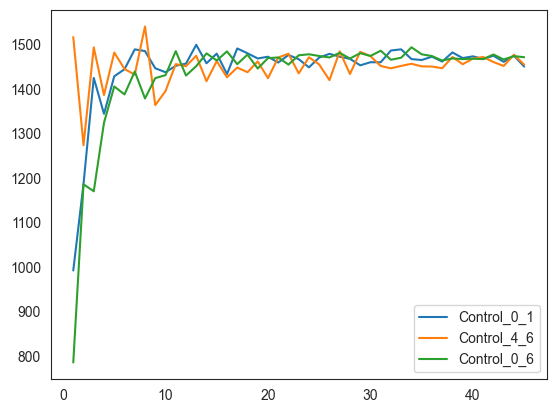

In [65]:
mean = nairobierrordf_del_0_1.T.describe().loc['mean']
std = nairobierrordf_del_0_1.T.describe().loc['std']
plt.plot(x, mean, label="Control_0_1")
# plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)

mean = nairobierrordf_del_4_6.T.describe().loc['mean']
std = nairobierrordf_del_4_6.T.describe().loc['std']
plt.plot(x, mean, label="Control_4_6")
# plt.fill_between(x, mean - std, mean + std, color='r', alpha=0.2)

mean = nairobierrordf_del_0_6.T.describe().loc['mean']
std = nairobierrordf_del_0_6.T.describe().loc['std']
plt.plot(x, mean, label="Control_0_6")
# plt.fill_between(x, mean - std, mean + std, color='g', alpha=0.2)
plt.legend()


#### Perth

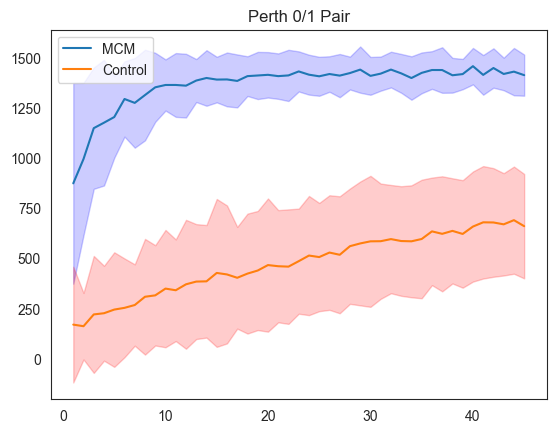

In [66]:
mean = pertherrordf_mcm_0_1.T.describe().loc['mean']
std = pertherrordf_mcm_0_1.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = pertherrordf_del_0_1.T.describe().loc['mean']
std2 = pertherrordf_del_0_1.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Perth 0/1 Pair")
plt.legend()

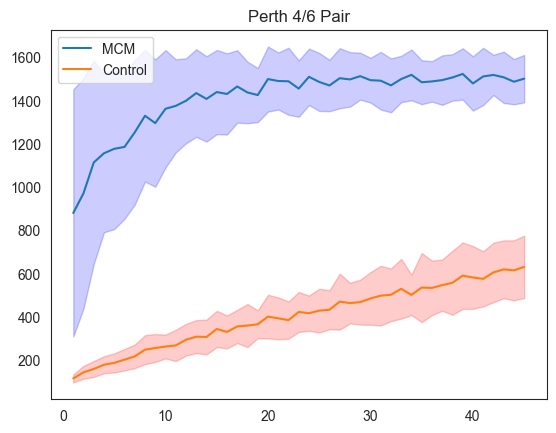

In [67]:
mean = pertherrordf_mcm_4_6.T.describe().loc['mean']
std = pertherrordf_mcm_4_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = pertherrordf_del_4_6.T.describe().loc['mean']
std2 = pertherrordf_del_4_6.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Perth 4/6 Pair")
plt.legend()

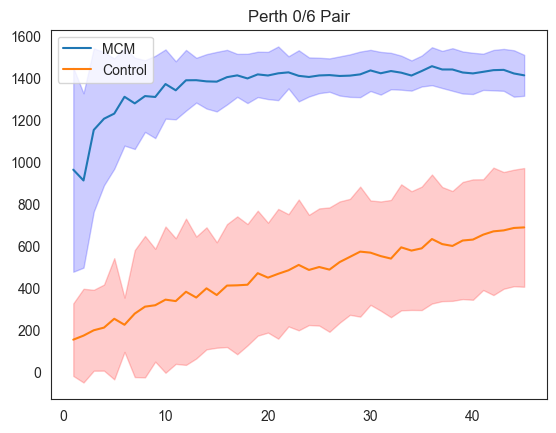

In [68]:
mean = pertherrordf_mcm_0_6.T.describe().loc['mean']
std = pertherrordf_mcm_0_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM")
plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)
mean2 = pertherrordf_del_0_6.T.describe().loc['mean']
std2 = pertherrordf_del_0_6.T.describe().loc['std']
plt.plot(x, mean2, label="Control")
plt.fill_between(x, mean2 - std2, mean2 + std2, color='r', alpha=0.2)
plt.title("Perth 0/6 Pair")
plt.legend()

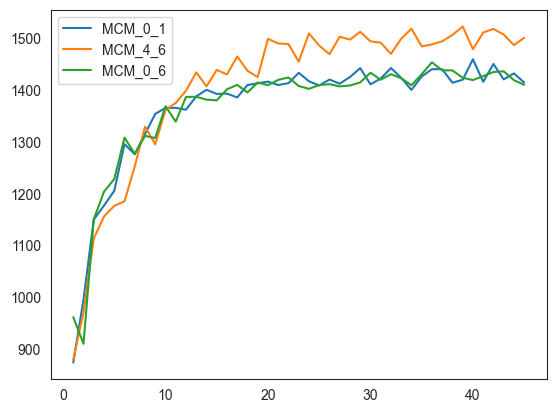

In [69]:
mean = pertherrordf_mcm_0_1.T.describe().loc['mean']
std = pertherrordf_mcm_0_1.T.describe().loc['std']
plt.plot(x, mean, label="MCM_0_1")
# plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)

mean = pertherrordf_mcm_4_6.T.describe().loc['mean']
std = pertherrordf_mcm_4_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM_4_6")
# plt.fill_between(x, mean - std, mean + std, color='r', alpha=0.2)

mean = pertherrordf_mcm_0_6.T.describe().loc['mean']
std = pertherrordf_mcm_0_6.T.describe().loc['std']
plt.plot(x, mean, label="MCM_0_6")
# plt.fill_between(x, mean - std, mean + std, color='g', alpha=0.2)
plt.legend()


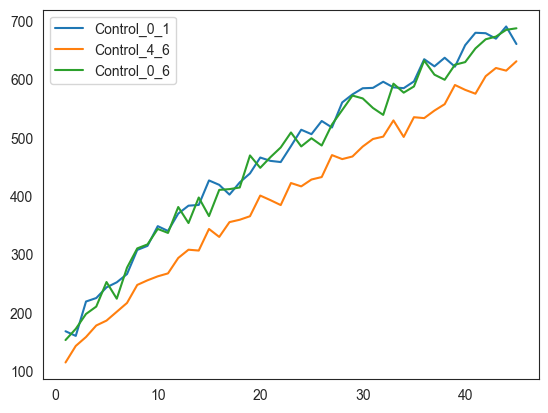

In [70]:
mean = pertherrordf_del_0_1.T.describe().loc['mean']
std = pertherrordf_del_0_1.T.describe().loc['std']
plt.plot(x, mean, label="Control_0_1")
# plt.fill_between(x, mean - std, mean + std, color='b', alpha=0.2)

mean = pertherrordf_del_4_6.T.describe().loc['mean']
std = pertherrordf_del_4_6.T.describe().loc['std']
plt.plot(x, mean, label="Control_4_6")
# plt.fill_between(x, mean - std, mean + std, color='r', alpha=0.2)

mean = pertherrordf_del_0_6.T.describe().loc['mean']
std = pertherrordf_del_0_6.T.describe().loc['std']
plt.plot(x, mean, label="Control_0_6")
# plt.fill_between(x, mean - std, mean + std, color='g', alpha=0.2)
plt.legend()
